In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data =pd.read_csv('/content/melb_data.csv')

In [3]:
data.shape

(13580, 21)

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
data.isna().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [7]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [8]:
data['Suburb'].nunique()

314

In [9]:
data['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [10]:
data['Method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [11]:
data['CouncilArea'].nunique()

33

In [12]:
numeric_cols =data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols =data.select_dtypes(include=['object']).columns.tolist()


print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
Categorical Columns: ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [13]:
missing_pct = (data.isnull().mean() * 100).sort_values(ascending=False)
print("\nMissing Values %:\n", missing_pct)


Missing Values %:
 BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Car               0.456554
Suburb            0.000000
Price             0.000000
Type              0.000000
Rooms             0.000000
Address           0.000000
Distance          0.000000
Method            0.000000
Date              0.000000
SellerG           0.000000
Bathroom          0.000000
Bedroom2          0.000000
Postcode          0.000000
Landsize          0.000000
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64


In [14]:
correlation_with_price = data[numeric_cols].corr()['Price'].abs().sort_values(ascending=False)
print("\nTop Correlations with Price:\n", correlation_with_price)


Top Correlations with Price:
 Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
YearBuilt        0.323617
Car              0.238979
Lattitude        0.212934
Longtitude       0.203656
Distance         0.162522
Postcode         0.107867
BuildingArea     0.090981
Propertycount    0.042153
Landsize         0.037507
Name: Price, dtype: float64


In [15]:
data['BuildingArea'].skew()

np.float64(77.69154091544215)

In [16]:
from sklearn.impute import SimpleImputer
B_imp =SimpleImputer(strategy='median')


data['BuildingArea'] =B_imp.fit_transform(data[['BuildingArea']])

print(data['BuildingArea'].isnull().sum())

0


In [17]:
data['BuildingArea'].skew()

np.float64(107.1285305272771)

In [18]:
data['YearBuilt'].skew()

np.float64(-1.5412787597590965)

In [19]:
data['YearBuilt'] =B_imp.fit_transform(data[['YearBuilt']])

print(data['YearBuilt'].isnull().sum())

0


In [20]:
data.isna().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [21]:
data['Car'].skew()

np.float64(1.3696759255976967)

In [22]:
# use median imputation in car column
data['Car'] =B_imp.fit_transform(data[['Car']])

data['Car'].skew()

np.float64(1.3660172630794754)

In [23]:
data['Car'].isna().sum()

np.int64(0)

In [24]:
data['CouncilArea'].mode()

,CouncilArea
0,Moreland


In [25]:
#use mode for council area
Mode_imp =SimpleImputer(strategy='most_frequent')

data['CouncilArea'] =Mode_imp.fit_transform(data[['CouncilArea']]).ravel()

In [26]:
data.isna().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [27]:
data.nunique().sort_values(ascending=False)

,0
Address,13378
Longtitude,7063
Lattitude,6503
Price,2204
Landsize,1448
BuildingArea,602
Suburb,314
Propertycount,311
SellerG,268
Distance,202


In [28]:
high_cardinality_cols = [col for col in data.columns if data[col].nunique() > 50 and data[col].dtype == 'object']
high_cardinality_cols

['Suburb', 'Address', 'SellerG', 'Date']

In [29]:
low_cardinality_cols = [col for col in data.columns if data[col].nunique() < 50 and data[col].dtype == 'object']
low_cardinality_cols

['Type', 'Method', 'CouncilArea', 'Regionname']

In [30]:
data['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [31]:
data =pd.get_dummies(data ,columns=['Type'] ,drop_first=True)

In [32]:
data =pd.get_dummies(data ,columns=['Method'] ,drop_first=True)

In [33]:
data['CouncilArea'].nunique()

33

In [34]:
# freq encoding for Suburb
suburb_freq = data['Suburb'].value_counts()
data['Suburb'] = data['Suburb'].map(suburb_freq)

In [35]:
suburb_freq = data['CouncilArea'].value_counts()
data['CouncilArea'] = data['CouncilArea'].map(suburb_freq)

In [36]:
data.drop('Address', axis=1, inplace=True)

In [37]:
data.drop('SellerG', axis=1, inplace=True)

In [38]:
data.drop('Regionname', axis=1, inplace=True)

In [39]:
data['Year'] = pd.to_datetime(data['Date'], dayfirst=True).dt.year
data['Month'] = pd.to_datetime(data['Date'], dayfirst=True).dt.month
data.drop('Date', axis=1, inplace=True)

In [40]:
data.shape

(13580, 23)

In [41]:
data.head()

,Suburb,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,Longtitude,Propertycount,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Year,Month
0,56,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,126.0,...,144.9984,4019.0,False,False,True,False,False,False,2016,12
1,56,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,...,144.9934,4019.0,False,False,True,False,False,False,2016,2
2,56,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,...,144.9944,4019.0,False,False,False,False,True,False,2017,3
3,56,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,126.0,...,144.9969,4019.0,False,False,False,False,False,False,2017,3
4,56,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,...,144.9941,4019.0,False,False,False,False,False,True,2016,6


In [42]:
# train test split

x =data.drop('Price', axis =1)
y =data['Price']

x_train, x_test ,y_train ,y_test =train_test_split(x , y ,test_size=0.2 ,random_state=42)

In [43]:
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape

((10864, 22), (2716, 22), (10864,), (2716,))

In [44]:
dt_reg =DecisionTreeRegressor(random_state=42)

In [45]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [46]:
y_pred = dt_reg.predict(x_test)

In [47]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 224593.84720176732
MSE: 150714117587.20877
RMSE: 388219.16179808637
R²: 0.6205718505270743


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [49]:
y_pred = grid_search.predict(x_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R² Score: 0.7123523873142719
MAE: 206788.84932715294
RMSE: 338020.1426589637


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)


param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_reg,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)


random_search.fit(x_train, y_train)


print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [53]:
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 160303.6424040601
RMSE: 263337.3964148259
R² Score: 0.8254175083686629


Feature Importance

In [56]:
importances = best_rf.feature_importances_
features = x_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


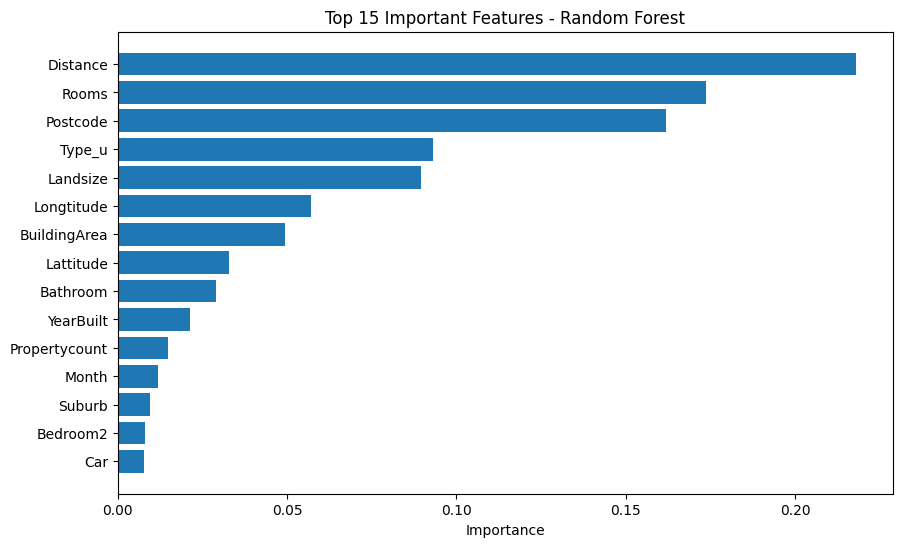

          Feature  Importance
2        Distance    0.218009
1           Rooms    0.173606
3        Postcode    0.161865
15         Type_u    0.093232
7        Landsize    0.089430
12     Longtitude    0.056965
8    BuildingArea    0.049330
11      Lattitude    0.032881
5        Bathroom    0.029122
9       YearBuilt    0.021171
13  Propertycount    0.014938
21          Month    0.011735
0          Suburb    0.009622
4        Bedroom2    0.008161
6             Car    0.007724


In [57]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"][:15], feature_importance_df["Importance"][:15])
plt.gca().invert_yaxis()
plt.title("Top 15 Important Features - Random Forest")
plt.xlabel("Importance")
plt.show()

print(feature_importance_df.head(15))